In [11]:
# -*- coding: utf-8 -*-

_Created on Tue Dec 29 20:07:41 2015_

@author: ACHARI BERRADA YOUSSEF && BARAA ELALAMI, X2013 

Course: Monte Carlo Simulation (MAP564) 

Professor: Emmanuel Gobet 

In [12]:
import numpy as np #import de numpy sous l'alias np
import numpy.random as npr #import de numpy.random sous l'alias npr
import numpy.linalg as npl # for the computation of the eigenvalues
import matplotlib.pyplot as plt #import de matplotlib.pyplot sous l'alias plt
from numpy import sqrt
import pylab as plb # Pour Histogramme 
from pylab import pi

###                                                              Partie I
Trajectoires de $N$(petit) valeurs propres associees au mouvement brownien de Dyson. 

In [13]:
#Initialisation parametre de la Partie I
N = 40
T = 1
n = 2**10

#### Etape 1 : 
Construction d'un vecteur de k mouvement brownien de variance $\sigma^2$ discretise au pas de $h = \frac{T}{n}$ entre $[0,T]$

In [14]:
def bM(k,T,n,sigma) :
    h= T/n 
    W = sqrt(h)* sigma * npr.randn(k,n+1)
    W[:,0]=np.zeros(k)
    W = np.cumsum(W, axis=1)
    return W
#W = bM(2,1,n,1/sqrt(N/2))

#### Etape 2 : 
Construction de la matrice aleatoire de taille $N$, $A_t$ au temps $t = k * \frac{T}{n}$ avec $k=0..n$

In [15]:
def aleaMatrix(N,n,T) : 
    
    A = np.zeros([n+1,N,N])    
    #remplissage de la diagonale 
    sigmaDiag = 1/sqrt(N/2)
    Wii = bM(N,T,n,sigmaDiag)
    for t in range(n+1): 
        np.fill_diagonal(A[t],Wii[:,t])   
    #remplissage symetrique du reste de la matrice 
    sigmaHorsDiag = 1/sqrt(N)
    for i in range(0,N-1) : 
        Wij = bM(N-1-i,T,n,sigmaHorsDiag)
        for t in range(n+1):
            A[t,i,i+1:N] = Wij[:,t]
            A[t,i+1:N,i] = Wij[:,t]
    
    return A 

#A=aleaMatrix(N,n,T)

#### Etape 3 : 
Calcule des valeurs propres de A_t pour tout t = k * T/n avec k=0..n

In [16]:
def valeurPropre(N,n,T) : 
    Lambda = np.zeros([N,n+1])    
    A = aleaMatrix(N,n,T)
    for t in range(n+1) :
        Lambda[:,t]= npl.eigvalsh(A[t])
    
    return Lambda
    
#Lambda = valeurPropre(N,n,T)

#### Etape 4 : 
Tracer les Trajectoires des valeurs propres 

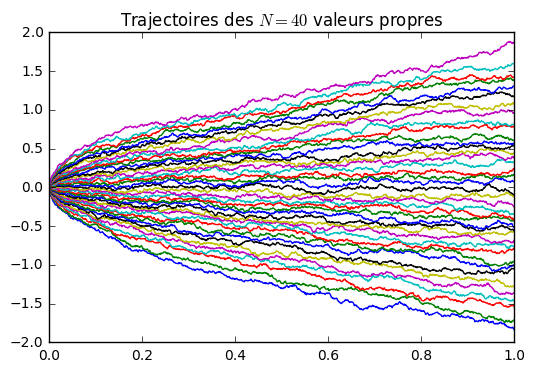

In [17]:
def plotTraj(N,n,T) : 
    Tx = np.linspace(0,T,n+1)
    Lambda = valeurPropre(N,n,T)
    for n in range(N):
        plt.plot(Tx,Lambda[n,:])
    plt.title('Trajectoires des $N = %s$ valeurs propres'%(N))
    plt.show()

plotTraj(N,n,T)

###                                                              Partie II
Histogramme des valeurs propres au temps T pour un N assez Grand.

In [18]:
#Initialisation parametre de la Partie II
N=2000
T=1

#### Etape 1 : 
Construction de la matrice aleatoire au temps T 

In [19]:
def aleaMatrixFin(N,T) : 
    
    A = np.zeros([N,N])    
    #remplissage de la diagonale 
    sigmaDiag = 1/sqrt(N/2)
    Wii = sigmaDiag * sqrt(T)* npr.randn(N)
    np.fill_diagonal(A,Wii)
    
    #remplissage symetrique du reste de la matrice 
    sigmaHorsDiag = 1/sqrt(N)
    for i in range(0,N-1) : 
        Wij = sigmaHorsDiag * sqrt(T) * npr.randn(N-1-i)
        for t in range(n+1):
            A[i,i+1:N] = Wij
            A[i+1:N,i] = Wij
    
    return A 
    
#A = aleaMatrixFin(10,1)

#### Etape 2 : 
Histogramme des valeurs propres au temps $T$ et loi de Wigner

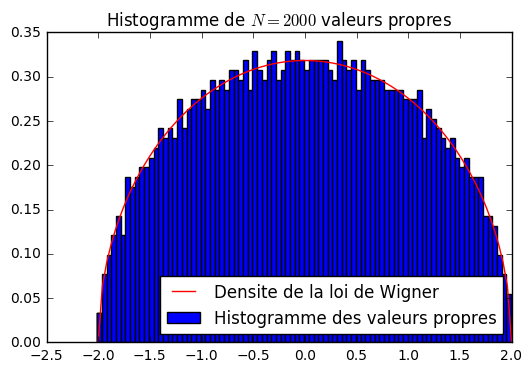

In [20]:
def histLambdaT(N,T) :
    
    A = aleaMatrixFin(N,T)
    Lambda= npl.eigvalsh(A)
    
    plt.title('Histogramme de $N = %s$ valeurs propres' %(N))
    plb.hist(Lambda, normed="True", bins=2*int(sqrt(N)),label=u"Histogramme des valeurs propres")
    x=np.linspace(-2.,2.,100)# discretisation de l'intervalle [-2,2]
    f_x= np.sqrt(4.-x**2)/(pi*2)# discretisation de la densite theorique de Wigner
    plt.plot(x, f_x, "r", label=u"Densite de la loi de Wigner")
    plt.legend(loc='lower right')
    plt.show()

histLambdaT(N,T)